## Homework 1-3: Prediction using kNN and Regression Methods



For this section, our goal is to get you <font color=orange>familiarized</font> (熟悉) with **k-Nearest Neighbors** (K-最近邻), **Linear**, and **Polynomial Regression** (多项式回归). 

These methods find powerful applications in all walks of life and are centered around prediction. 


Specifically, we will: 
    
* Load in the <font color=orange>iris dataset</font> (虹膜数据集) which is split into a training and testing dataset
* Do some basic <font color=orange>exploratory</font> (探索性的) analysis of the dataset and go through a <font color=orange>scatterplot</font> (散点图)
* Write out the algorithm for kNN <font color=red>WITHOUT using the sklearn package</font>
* Use the **sklearn package** to <font color=orange>implement</font> (实施) kNN and compare to the one we did by hand
* Extend the **sklearn package** to **linear** and **polynomial regression** 

For this section we will be using the following packages:

In [1]:
import sys
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 999)
pd.set_option('display.width', 500)
pd.set_option('display.notebook_repr_html', True)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Note --  Requires sklearn version .18 or higher  
from sklearn import metrics, datasets
from collections import Counter
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

assert(sys.version_info.major==3),print(sys.version)
# Python 3 or higher is required

In [2]:
import sys
sys.executable

'/opt/anaconda3/envs/ML_EXP/bin/python'

## Review – Python list comprehensions 

In [3]:
# Makes a list of all the even numbers from 0 to 20 
# with a for loop
l = []
for i in range(20):
    if i%2 ==0:
        l.append(i)
l

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

### Makes a list of even numbers from 0 to 20 using a python list comprehension 

In [4]:
## even Numbers 偶数
l = []  
[l.append(i) for i in range(20) if i % 2 == 0]
l

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

## Load in the iris dataset and EDA:

The iris dataset can be found within the **sklearn** package and contains measurement data for three types of Iris' (a kind of flower): 1) **Setosa**, 2) **Versicolour**, and 3) **Virginica**. 

For each type of Iris, we have recorded the **sepal length**, **sepal width**, **petal length**, and **petal width** in centimeters. 

(The sepal can be basically thought of as the <font color=orange>outer-most petal</font> (最外面的花瓣) of a flower).  

These four measurements were done on 50 unique Setosa, 50 unique Versicolour, and 50 unique Virginia flowers for a total of 150 unique flower measurements. 

In the dataset below, we will let the **target** variable <font color=orange>designate</font> (指定) the flower type by letting **0** represent Setosa, **1** represent Versicolour, and **2** represent Virginica. Now, we will load in the dataset:

In [5]:
# Load in the dataset, which is contained in the sklearn package
# Inital version of dataset is in dict-like container object
iris_bunch = datasets.load_iris()

# np.c_ is the numpy concatenate function which combines the data array and target array.
# The target array is our "Y" variable and the data array are the "X" variables. 
iris = pd.DataFrame(data= np.c_[iris_bunch['data'], iris_bunch ['target']],
                     columns= iris_bunch['feature_names'] + ['target'])

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


We can use the **describe()** function to summarize our dataset. 

When using the **describe()** function, some care should be taken to interpret the values based on what the data represent. 

For example, the **count** row shows we have 150 observations. 

The **target** column doesn't have too much interpretive value as the other columns as we are letting **0**, **1**, and **2** be **categorical** variables indicating which flower type was measured.

In [6]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


We can also use the **groupby** function to <font color=red>look at mean stats aggregated by flower type</font> 

In [7]:
iris.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,5.006,3.428,1.462,0.246
1.0,5.936,2.770,4.260,1.326
2.0,6.588,2.974,5.552,2.026


In general, it is good practice to normalize data before proceeding. 

As such, we can create the following functions:

In [8]:
# Takes in a dataset and normalizes it. 
def normalize(x):
    num = x - np.min(x)
    denom = np.max(x) - np.min(x)
    return (num / denom)

iris.iloc[:, 0:4] = normalize(iris.iloc[:, 0:4])

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


Let's see what the describe function **AFTER** normalization:

In [9]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056,1.000000
std,0.230018,0.181611,0.299203,0.317599,0.819232
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,1.000000
75%,0.583333,0.541667,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


We can also use the **pairplot()** function to create a scatterplot matrix of our data:

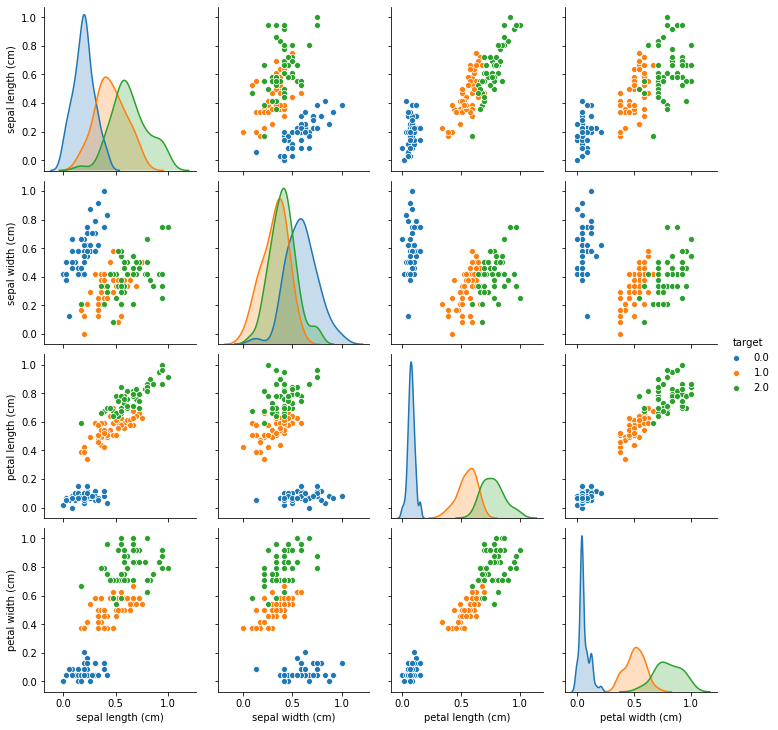

In [10]:
features_cols = iris.columns[:4]
sns.pairplot(data=iris,hue='target',vars=features_cols)

## Split up the data into a training set and a test set:

Now that we have an idea of what the data looks like, we would like to <font color=blue>create a way to predict flower type</font> (Setosa, Versicolour, or Virginica) based on our 4 **predictor variables**. 

Whatever method we use, it would be nice to have a way to <font color=red>assess how accurate our model is. </font>

Therefore, we will be breaking up the data into a **training** and a **testing** set. 

The **training** set will be used to train the model, while the **testing** set will be used to gauge how well our model does in general. 

The **testing** set is a way for us to <font color=blue>ensure our model doesn't overfit our data.</font>

Let us first create a function that will randomly split the data up into a 70-30 split, with 70% of the data going into the **testing** set:

70% 测试集，30% 训练集

In [11]:
# 建立 numpy 下的 iris_np
iris_np = np.array(iris)

In [12]:
import random

def split_data(data):
    # Determine the number of observations we have in our entire data set:
    len_data = len(data)
    
    # Create a list of integer indices ranging over our number of observations:
    train = []
    test = []
    
    # Use numpy's random.shuffle() function to randomly shuffle over our index:
    np.random.shuffle(data)
    
    # Create a list for the first 70% of the shuffled indices and set to training: 
    train = data[0: int(len_data*0.7)]
    
    # Create a list for the remaining 30% of the shuffled indices and set to testing:
    test = data[int(len_data*0.7) : ]
    
    # Use the list of training indices to find the corresponding data entries:
    # YOUR CODE GOES HERE
    
    # Use the list of testing indices to find the corresponding data entries:
    # YOUR CODE GOES HERE
    
    # Return two dataframes, one with the testing data and one with the training data:
    
    train = pd.DataFrame(train)
    test = pd.DataFrame(test)
    
    return train, test

We will now run the function and see if it returns actually what we want:

In [13]:
iris_train,iris_test  = split_data(iris_np)

# Return the dimensions of our training dataframe after using the split_data function:
iris_train.describe()

,0,1,2,3,4
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.431481,0.438492,0.470541,0.465873,1.009524
std,0.241826,0.166876,0.302845,0.324079,0.826197
min,0.000000,0.083333,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.559322,0.500000,1.000000
75%,0.583333,0.541667,0.694915,0.708333,2.000000
max,1.000000,0.916667,1.000000,1.000000,2.000000


In [14]:
iris_test.describe()

,0,1,2,3,4
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.422222,0.445370,0.460264,0.439815,0.977778
std,0.202191,0.214091,0.293767,0.304708,0.811533
min,0.083333,0.000000,0.033898,0.000000,0.000000
25%,0.250000,0.291667,0.084746,0.125000,0.000000
50%,0.416667,0.416667,0.576271,0.500000,1.000000
75%,0.555556,0.583333,0.694915,0.708333,2.000000
max,0.861111,1.000000,0.864407,0.958333,2.000000


## Alternative approach using train_test_split from sklearn

In [15]:
iris_train, iris_test = train_test_split(iris, test_size=0.3)
iris_train.shape

(105, 5)

## Implementing the kNN Algorithm by hand:

To really understand how the kNN algorithm works, it helps to go through the algorithm line by line in code.

In [16]:
def knn_algorithm(train, test, k):
    
    # Create any empty list to store our predictions in:
    predictions = []
    
    predictor_cols = [col for col in train.columns if col != 'target']
    
    # Separate the response and predictor variables from training and test set:
    # 将特征和标签分开
    train_x = train[predictor_cols]
    train_y = train['target']
    test_x  = test[predictor_cols]
    test_y  = test['target']
    
    for index, row in test_x.iterrows():
        
        # 对每个数据点，存储所有训练点和测试点之间的距离
        # For each test point, store the distance between all training points and test point
        vec_distances = pd.DataFrame((train_x.values - row.values)**2, index=train.index, columns = train_x.columns)

        # 然后，我们对每行的列求和以获得欧几里得距离的平方
        # Then, we sum across the columns per row to obtain the Euclidean distance squared
        distances = vec_distances.sum(axis = 1)
        
        # 对到训练点的距离进行排序（按升序）并取前 k 个点
        # Sort the distances to training points (in ascending order) and take first k points
        nearest_k = distances.sort_values().iloc[:k]
        # For simplicity, we omitted the square rooting of the Euclidean distance because the
        # square root function preserves order. 
        
        # 取最近k个点对应的训练集y值的均值
        # Take the mean of the y-values of training set corresponding to the nearest k points
        k_mean = train_y[nearest_k.index].mean()
        
        # Add on the mean to our predicted y-value list
        predictions.append(k_mean)
    
    # Create a dataframe with the x-values from test and predicted y-values  
    predict = test.copy()  
    predict['target'] = pd.Series(predictions, index=test.index)
    
    return predict

Now to run the algorithm on our dataset with $k = 5$:

In [17]:
k = 5
predicted_knn = knn_algorithm(iris_train, iris_test, k)
predicted_knn

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
79,0.388889,0.250000,0.423729,0.375000,1.0
22,0.083333,0.666667,0.000000,0.041667,0.0
142,0.416667,0.291667,0.694915,0.750000,1.8
8,0.027778,0.375000,0.067797,0.041667,0.0
74,0.583333,0.375000,0.559322,0.500000,1.0
65,0.666667,0.458333,0.576271,0.541667,1.0
76,0.694444,0.333333,0.644068,0.541667,1.0
132,0.583333,0.333333,0.779661,0.875000,2.0
134,0.500000,0.250000,0.779661,0.541667,1.4
67,0.416667,0.291667,0.525424,0.375000,1.0


We want to have a way to evaluate our predictions from the kNN algorithm with $k=5$. 

One way is to compute the $R^2$ coefficient. Let's create a function for that:

In [18]:
def evaluate(predicted, true):
    # Find the squared error:
    squared_error = (predicted['target'] - true['target'])**2
    
    # Finding the mean squared error:
    error_var = squared_error.sum()
    sample_var = ((true['target'] - true['target'].mean())**2).sum()
    
    r = (1 - (error_var / sample_var))
    
    return r

Then let's apply this function to our predictions:

In [19]:
evaluate(predicted_knn, iris_test)

0.9438356164383561

We see that the coefficient for the Nearest Neighbors implementation with $k=5$ is $R^2 = 0.9745$, which should more or less match what we get with the sklearn package. 

## Now using sklearn to implement kNN:

We will now use the **sklearn** package to implement kNN:

Here, we will split our data using the train_test_split function from sklearn.

In [20]:
# Now we can use sklearn's train_test_split function to split our data:
train, test =  train_test_split(iris, test_size=.3)

x_train, x_test = train[features_cols], test[features_cols]
y_train, y_test = train['target'], test['target']

Then, we can fit the model and use various metrics to assess our accuracy:

We can also introduce a **Confusion Matrix**:

In [21]:
# Set kNN parameter:
k = 10

# Now we can fit the model, predict our variable of interest, and then evaluate our fit:
# First, we create the classifier object:
neighbors = KNeighborsClassifier(n_neighbors=k)

# Then, we fit the model using x_train as training data and y_train as target values:
neighbors.fit(x_train, y_train)

# Retreieve our predictions:
prediction_knn = neighbors.predict(x_test)

# This returns the mean accuracy on the given test data and labels, or in other words, 
# the R squared value -- A constant model that always predicts the expected value of y, 
# disregarding the input features, would get a R^2 score of 1.
r = neighbors.score(x_test, y_test)
r


0.9333333333333333

In [22]:
expected_knn = y_test
predicted_knn = neighbors.predict(x_test)
print(metrics.classification_report(expected_knn, predicted_knn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.87      0.93      0.90        14
         2.0       0.94      0.89      0.91        18

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [23]:
pd.DataFrame(metrics.confusion_matrix(expected_knn, predicted_knn))

,0,1,2
0,13,0,0
1,0,13,1
2,0,2,16


In the above, 4 flowers belonging to class 3 were mis-classified as class 2, while 2 flowers of class 2 were mis-classified as class 3. 

A confusion matrix allows us to view where our inaccurate predictions lie in a simple "snapshot" style matrix.

# Linear and Polynomial Regression

We just went over the kNN prediction method. Now, we will fit the same data, but onto linear and polynomial regressions.

## Linear Regression:

We will use the training/testing dataset as before and create our linear regression objects.

In [24]:
from statsmodels.api import OLS
# We must first create the linear regression object from sklearn:
regr = LinearRegression()
# Then, we will put in the training sets in for the .fit() function:
regr.fit(x_train, y_train)
# This prints the regression coefficients of our model:
print(regr.coef_)

[-0.29594467 -0.24987077  0.81974112  1.81033892]


In [25]:
import statsmodels.api as sm
# We must first create the linear regression object from stats model:
model = sm.OLS(y_train.values, x_train)
regr = model.fit()
# This prints the regression coefficients of our model:
regr.params

sepal length (cm)   -0.304529
sepal width (cm)    -0.232735
petal length (cm)    0.843742
petal width (cm)     1.800343
dtype: float64

Now, we will compute metrics that can be used to assess fit:

In [26]:
# To compute the mean squared error (notice that we are now using the TEST set):
np.mean((regr.predict(x_test)-y_test)**2)

0.05890822527988819

In [27]:
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              893.4
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                    7.50e-78
Time:                        19:06:39   Log-Likelihood:                          16.290
No. Observations:                 105   AIC:                                     -24.58
Df Residuals:                     101   BIC:                                     -13.97
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
sepal length (cm)    -0.3045      0.224     -1.362      0.176      -0.748       0.139
sepal width (cm)     -0.2327      0.080     -2.894      0.005      -0.392      -0.073
petal length (cm)     0.8437      0.340      2.483      0.015       0.170       1.518
petal width (cm)      1.8003      0.258      6.969      0.000       1.288       2.313
==============================================================================
Omnibus:                        0.387   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.178
Skew:                          -0.096   Prob(JB):                        0.915
Kurtosis:                       3.063   Cond. No.                         20.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Instead of focusing on $R^2$, let’s look at the classification stats..

In [28]:
predicted_knn = np.round(regr.predict(x_test))
print(metrics.classification_report(expected_knn, predicted_knn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.82      1.00      0.90        14
         2.0       1.00      0.83      0.91        18

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.95      0.93      0.93        45



In [29]:
pd.DataFrame(metrics.confusion_matrix(expected_knn, predicted_knn))

,0,1,2
0,13,0,0
1,0,14,0
2,0,3,15


## Polynomial Regression


Polynomial regression is useful when you suspect a non-linear relationship between the predictor variables $x$ and the conditional expectation of $y$. Specifically, it is a special case of linear regression where the predictor variables are modeled through an $n$th degree polynomial. In Python, we can create the polynomial features through scikit-learn's PolynomialFeatures package. Then, we can use linear regression to implement a polynomial regression model. 

We first need to create the PolynomialFeatures object and specify to what degree we wish to take our polynomial to:

In [30]:
# Create the PolynomialFeatures object and specify the number of degrees:
degree = 2
poly = PolynomialFeatures(degree)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
pd.DataFrame(x_train_poly).shape

(105, 15)

In [31]:
# Create a linear regression object
lg = LinearRegression()

# Fit our training data with polynomial features 
lg.fit(x_train_poly, y_train)

# Obtain coefficients
lg.coef_

array([ 0.        , -2.76558223,  0.38338892,  2.57151849,  1.03155876,
       -3.9832466 ,  7.06290498,  3.96577061,  1.51443468, -1.33669454,
       -4.40704204, -1.94458824,  0.79286637, -2.77127322,  1.85561775])

Now we can also do prediction:

In [32]:
# Predict from our fitted polynomial regression model based on our test set. 
poly.predicted = lg.predict(x_test_poly)
poly.predicted

array([ 8.92226964e-01,  2.13685593e+00,  2.85969727e-02,  1.25266999e+00,
        1.94511338e+00,  1.95443278e+00,  1.53289401e+00, -1.70584909e-02,
        1.29031921e+00,  4.33857898e-02,  9.92509486e-01,  1.98338638e+00,
       -5.00480241e-02,  9.83050458e-01,  1.58138336e+00,  1.93877694e+00,
        3.41630157e-02,  2.18652211e+00,  1.81271224e+00,  1.50445536e+00,
        2.13709481e+00,  9.28156619e-01,  9.23907144e-01,  1.23084956e+00,
        1.09005679e+00,  1.29153706e-02,  9.58670845e-01,  1.23333686e+00,
        1.92769241e+00,  1.08348066e+00,  1.84450501e+00, -2.37784673e-02,
        8.91756062e-03,  1.46653314e+00,  1.82282133e+00,  2.55090267e-02,
        1.31008996e+00, -9.12960210e-04,  6.62267439e-03,  1.62133824e+00,
        1.76486465e+00,  1.46682308e+00, -4.79734617e-02,  5.25965686e-02,
        1.65575591e+00])

In [33]:
# Computer the Mean Squared Error for Polynomial Regression:
np.mean((poly.predicted-y_test)**2)

0.053751255933694925

In [34]:
predicted_knn = np.round(poly.predicted)
print(metrics.classification_report(expected_knn, predicted_knn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.87      0.93      0.90        14
         2.0       0.94      0.89      0.91        18

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [35]:
pd.DataFrame(metrics.confusion_matrix(expected_knn, predicted_knn))

,0,1,2
0,13,0,0
1,0,13,1
2,0,2,16
